 importing the necessary libraries for data manipulation, visualization, and analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load dataset

In [2]:
df = pd.read_csv('Fashion_Retail_Sales.csv' )

Display first 5 rows

In [3]:
print(df.head(5))

   Customer Reference ID Item Purchased  Purchase Amount (USD) Date Purchase  \
0                   4018        Handbag                 4619.0    05-02-2023   
1                   4115          Tunic                 2456.0    11-07-2023   
2                   4019       Tank Top                 2102.0    23-03-2023   
3                   4097       Leggings                 3126.0    15-03-2023   
4                   3997         Wallet                 3003.0    27-11-2022   

   Review Rating Payment Method  
0            NaN    Credit Card  
1            2.0    Credit Card  
2            4.1           Cash  
3            3.2           Cash  
4            4.7           Cash  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB
None


checking for missing values

In [5]:
print(df.isnull().sum())


Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64


In [6]:
print(df.describe(include='all'))

        Customer Reference ID Item Purchased  Purchase Amount (USD)  \
count             3400.000000           3400            2750.000000   
unique                    NaN             50                    NaN   
top                       NaN           Belt                    NaN   
freq                      NaN             90                    NaN   
mean              4039.660588            NaN             156.709818   
std                 48.122583            NaN             419.536669   
min               3957.000000            NaN              10.000000   
25%               3997.000000            NaN              57.000000   
50%               4040.000000            NaN             110.000000   
75%               4081.000000            NaN             155.750000   
max               4122.000000            NaN            4932.000000   

       Date Purchase  Review Rating Payment Method  
count           3400    3076.000000           3400  
unique           365            NaN      

In [7]:
# Strategy: Fill missing numeric values with the median or mean, and categorical values with the mode
# For Purchase Amount (USD), fill missing values with the median
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].fillna(df['Purchase Amount (USD)'].median())

# For Review Rating, fill missing values with the median
df['Review Rating'] = df['Review Rating'].fillna(df['Review Rating'].median())

# Verify that missing values have been handled
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
Customer Reference ID    0
Item Purchased           0
Purchase Amount (USD)    0
Date Purchase            0
Review Rating            0
Payment Method           0
dtype: int64


Convert Date Column to DateTime Format

In [8]:
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'], format='%d-%m-%Y')

In [9]:
# Verify the conversion
print("\nDate Purchase Column After Conversion:")
print(df['Date Purchase'].head())


Date Purchase Column After Conversion:
0   2023-02-05
1   2023-07-11
2   2023-03-23
3   2023-03-15
4   2022-11-27
Name: Date Purchase, dtype: datetime64[ns]


In [10]:
df['Month'] = df['Date Purchase'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Purchase Amount (USD)'].sum()


Exploratory Data Analysis (EDA)

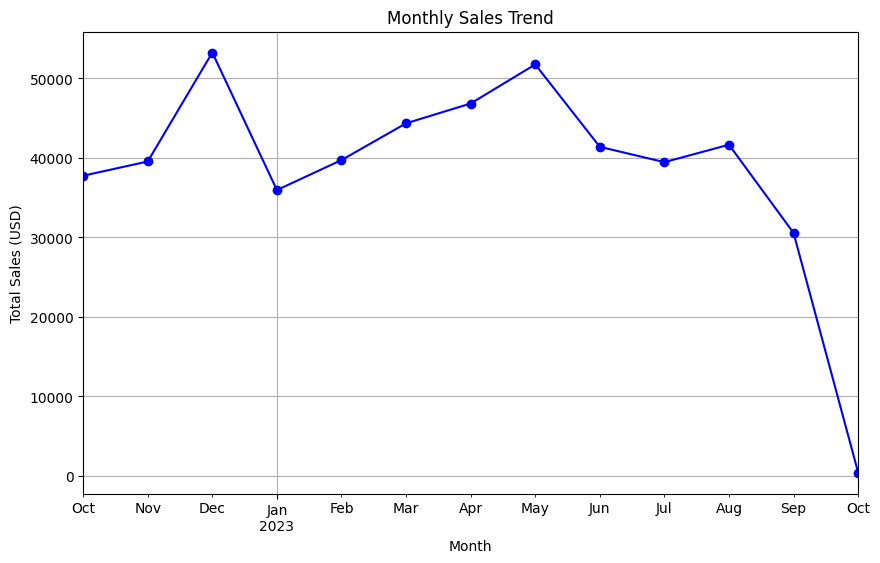

In [11]:
# Plot monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.show()

Most Popular Items



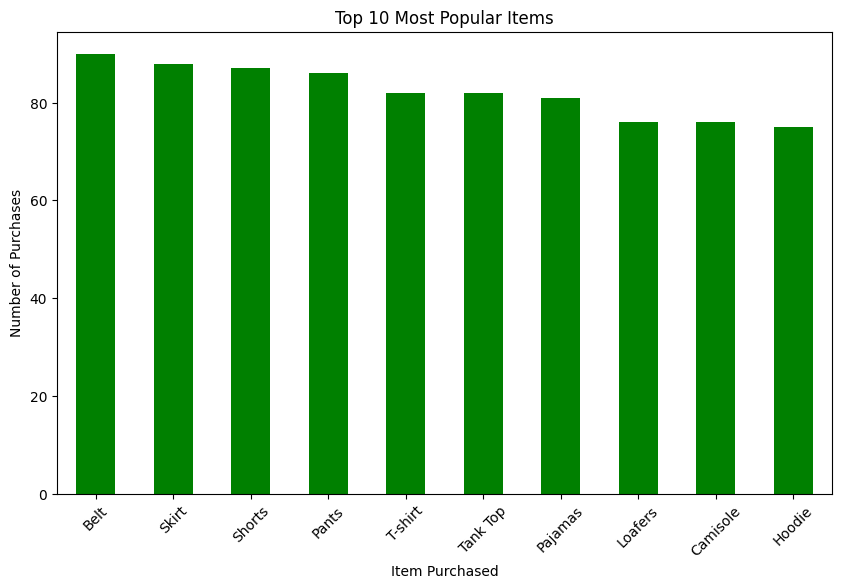

In [15]:
item_counts = df['Item Purchased'].value_counts().head(10)  # Updated column name

# Plot top 10 most popular items
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar', color='green')
plt.title('Top 10 Most Popular Items')
plt.xlabel('Item Purchased')  # Updated label
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Count the occurrences of each payment method
payment_counts = df['Payment Method'].value_counts()


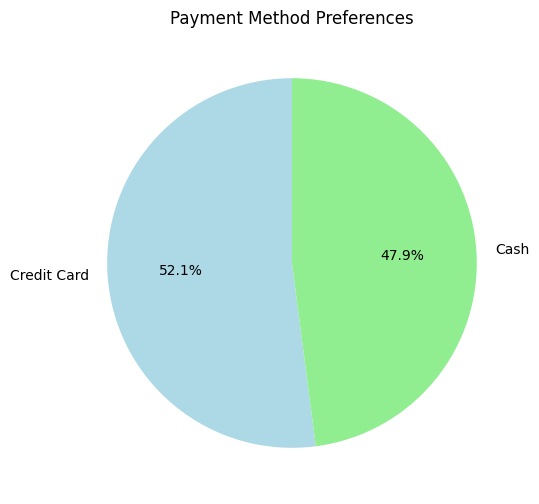

In [17]:
# Plot payment method preferences
plt.figure(figsize=(8, 6))
payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Payment Method Preferences')
plt.ylabel('')
plt.show()

Advanced Analysis

In [18]:
# Calculate correlation
correlation = df[['Purchase Amount (USD)', 'Review Rating']].corr()


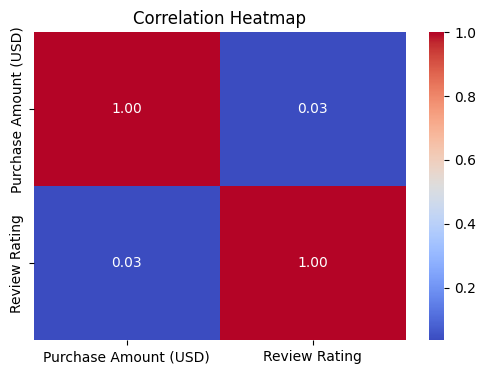

In [19]:
# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Customer Segmentation by Spending

In [20]:
# Create bins for spending categories
bins = [0, 50, 100, 200, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']
df['Spending Category'] = pd.cut(df['Purchase Amount (USD)'], bins=bins, labels=labels)

In [21]:
# Count customers in each category
spending_counts = df['Spending Category'].value_counts()

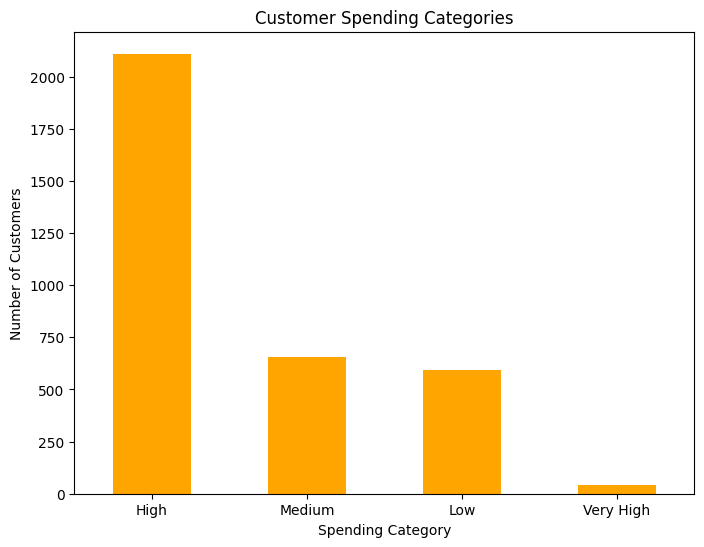

In [22]:
# Plot spending categories
plt.figure(figsize=(8, 6))
spending_counts.plot(kind='bar', color='orange')
plt.title('Customer Spending Categories')
plt.xlabel('Spending Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

In [23]:
# Export the cleaned dataset to a new CSV file
df.to_csv('Cleaned_Fashion_Retail_Sales.csv', index=False)
print("Cleaned dataset exported successfully.")

Cleaned dataset exported successfully.
